# Proyecto Primer Corte <a class="tocSkip">

Por Luz Rodriguez, David Benavides y Freddy Martinez

version 0.1, Marzo 2021

## Importar librerias

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib as cm
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
from math import log10

# Importar datos

Datos extraídos de la fuente 'Datos.gob.ar'

Fecha creación: 25 de septiembre de 2020

Datos actualizados por última vez: 12 de febrero de 2021

Fuente: [Datos.gob.ar](https://datos.gob.ar/dataset/justicia-linea-137---victimas-violencia-familiar---llamados-e-intervenciones-domiciliarias/archivo/justicia_21b615fc-001d-43d1-9396-e61f804a32cc) 

In [2]:
datos = pd.read_csv("C:/Users/David Benavides/Documents/Visualización de datos/llamados.csv",sep=";")
datos.head()

,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha_hora,llamado_provincia,llamado_provincia_id
0,344552.0,Comisaría,Masculino,Otra/o no familiar,Física y psicológica,27,18 a 29 años,Femenino,3,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,1/01/2017 1:37,Ciudad Autónoma de Buenos Aires,2
1,344553.0,Comisaría,Femenino,Sin datos,Física y psicológica,Sin dato,Sin dato,Femenino,2,1,Masculino,Hermano/a,Llamante solicitó información y/o orientación,1/01/2017 6:42,Ciudad Autónoma de Buenos Aires,2
2,344554.0,Víctima,Femenino,Madre,Física y psicológica,Sin dato,Sin dato,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,1/01/2017 6:48,Ciudad Autónoma de Buenos Aires,2
3,344555.0,Víctima,Femenino,No hay niñas/os,Física y psicológica,Sin dato,Sin dato,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,1/01/2017 6:54,Ciudad Autónoma de Buenos Aires,2
4,344556.0,Comisaría,Masculino,Otra/o no familiar,Psicológica,Sin dato,Sin dato,Masculino,1,1,Femenino,Madre,Llamante solicitó información y/o orientación,1/01/2017 7:11,Ciudad Autónoma de Buenos Aires,2


## Descripción de los datos

En esta base de datos se tiene la información de casos reportados de violencia intrafamiliar, en la base encontramos 16 variables con la siguiente información:

* caso_id: Id de los casos reportados
* llamante_descripcion: Persona que realizo la llamada y reporto el caso de violencia
* llamante_genero: Género de la persona que realizo la llamda
* llamante_vinculo_ninios_presentes: tipo de vinculo del llamante con la victima
* violencia_tipo: Tipo de violencia
* victima_edad: Edad de la victima
* victima_rango_etario: Rango de edad de la victima
* victima_genero: Género de la victima
* victima_cantidad: Cantidad de victimas reportadas en el caso
* agresor_cantidad: Cantidad de agresores reportadas en el caso
* agresor_genero: Género del agresor
* agresor_relacion_victima: Relación de la victima con el agresor
* llamado_derivacion: Información de la acciones tomadas luego de las llamadas
* llamado_fecha_hora: Fecha y hora de la llamada realizada
* llamado_provincia: Provincia en la que se origino el llamado
* llamado_provincia_id: Id de la provincia en la que se origino el llamado

In [3]:
datos.dtypes

caso_id                              float64
llamante_descripcion                  object
llamante_genero                       object
llamante_vinculo_ninios_presentes     object
violencia_tipo                        object
victima_edad                          object
victima_rango_etario                  object
victima_genero                        object
victima_cantidad                       int64
agresor_cantidad                       int64
agresor_genero                        object
agresor_relacion_victima              object
llamado_derivacion                    object
llamado_fecha_hora                    object
llamado_provincia                     object
llamado_provincia_id                   int64
dtype: object

In [4]:
datos1=datos

In [5]:
datos1.index=datos1.caso_id

In [6]:
datos1.shape

(35703, 16)

In [7]:
datos1=datos1.iloc[:,range(1,16,1)]
datos1.head()

,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha_hora,llamado_provincia,llamado_provincia_id
caso_id,,,,,,,,,,,,,,,
344552.0,Comisaría,Masculino,Otra/o no familiar,Física y psicológica,27,18 a 29 años,Femenino,3,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,1/01/2017 1:37,Ciudad Autónoma de Buenos Aires,2
344553.0,Comisaría,Femenino,Sin datos,Física y psicológica,Sin dato,Sin dato,Femenino,2,1,Masculino,Hermano/a,Llamante solicitó información y/o orientación,1/01/2017 6:42,Ciudad Autónoma de Buenos Aires,2
344554.0,Víctima,Femenino,Madre,Física y psicológica,Sin dato,Sin dato,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,1/01/2017 6:48,Ciudad Autónoma de Buenos Aires,2
344555.0,Víctima,Femenino,No hay niñas/os,Física y psicológica,Sin dato,Sin dato,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,1/01/2017 6:54,Ciudad Autónoma de Buenos Aires,2
344556.0,Comisaría,Masculino,Otra/o no familiar,Psicológica,Sin dato,Sin dato,Masculino,1,1,Femenino,Madre,Llamante solicitó información y/o orientación,1/01/2017 7:11,Ciudad Autónoma de Buenos Aires,2


# Identificación y retiro de datos faltantes

In [8]:
datos1.isnull().sum()

llamante_descripcion                  0
llamante_genero                       0
llamante_vinculo_ninios_presentes     0
violencia_tipo                       20
victima_edad                          0
victima_rango_etario                  0
victima_genero                        0
victima_cantidad                      0
agresor_cantidad                      0
agresor_genero                        0
agresor_relacion_victima              0
llamado_derivacion                    0
llamado_fecha_hora                    0
llamado_provincia                     0
llamado_provincia_id                  0
dtype: int64

In [9]:
datos1=datos1.dropna()

**Se encontro 20 datos faltante pertenecientes a la variable tipo de violencia, posterior a identificarlos se procedio a eliminarlos.**

# Retiro de datos pertenecientes a " Sin dato"

In [10]:
datos1.victima_edad.value_counts()

Sin dato     12477
Sin dato      2780
30             665
24             606
23             601
             ...  
101              3
97               3
99               3
98               3
100              1
Name: victima_edad, Length: 104, dtype: int64

In [11]:
datos2=datos1[datos1.victima_edad!="Sin dato"]
datos2=datos2[datos2.victima_edad!="Sin dato "]
datos2.shape

(20426, 15)

**Se encontraron 15257 datos sin información, al ser casi la mitad de la base de datos se decide no imputar y se procede a eliminarlos, dejando en la base un total de 20446 resgistros.**

## Duplicados

In [12]:
datos2.index.duplicated().sum()

1771

In [13]:
datos2=datos2[~datos2.index.duplicated()]
datos2.shape

(18655, 15)

**Se encontraron en la base 1771 datos duplicados, posterior a esto se retiraron dejandonos con 18655 registros**

# Tratamiento y limpieza de base por columnas

In [14]:
# Decripción de la persona que realizo la llamada
datos2.llamante_descripcion.replace({"Otra institución":"Otra Institución","Otro/a Particular":"Otro", "Otro/a particular":"Otro", "Otro/a": "Otro"},inplace=True)
datos2.llamante_descripcion.value_counts()

Comisaría           8609
Víctima             5340
Familiar            2474
Vecina/o             650
Otra Institución     566
Otro                 526
Hospital             387
NS/NC                 49
Agresor/a             46
Defensoría             8
Name: llamante_descripcion, dtype: int64

In [15]:
# Vinculos del llamante con la victima
datos2.llamante_vinculo_ninios_presentes.replace({"Hermano/a":"Hermano/o","Otra/o no familiar":"Otro/a no familiar","Otra/o familiar":"Otro familiar","Hermana/o":"Hermano/a"},inplace=True)
datos2.llamante_vinculo_ninios_presentes.value_counts()

Otro/a no familiar    6503
No hay niñas/os       5248
Madre                 3259
Otro familiar         1315
Sin datos              776
NS/NC                  646
Padre                  581
Hermano/o              182
Hermano/a              137
Padrastro                8
Name: llamante_vinculo_ninios_presentes, dtype: int64

In [16]:
# Tipo de violencia
datos2.violencia_tipo.replace({"Física, psicológica y económica":"Económica, física y psicológica","no aplica":"No aplica"},inplace=True)
datos2.violencia_tipo.value_counts()

Física y psicológica                   12431
Psicológica                             5332
Económica, física y psicológica          371
Económica y psicológica                  169
Sexual y psicológica                     159
Física, sexual y psicológica             137
Otras                                     31
Sexual, económica y psicológica           10
No es un caso de Violencia Familiar        8
No aplica                                  7
Name: violencia_tipo, dtype: int64

In [17]:
# Rango de la edad de la victima
datos2.victima_rango_etario.replace({"06 a 11 años":"6 a 11 años"},inplace=True)
datos2.victima_rango_etario.value_counts()

18 a 29 años      5782
30 a 39 años      4292
40 a 49 años      2740
Más de 60 años    1649
12 a 17 años      1414
50 a 59 años      1128
6 a 11 años        888
0 a 5 años         762
Name: victima_rango_etario, dtype: int64

In [18]:
# Cantidad de victimas y cantidad agresores
datos2=datos2[datos2.victima_cantidad!= 0]
datos2=datos2[datos2.agresor_cantidad!= 0]
datos2=datos2[datos2.agresor_cantidad!= 51]

In [19]:
# Relación del agresor con la victima
datos2=datos2[datos2.agresor_relacion_victima!= 'Madrastra']
datos2.agresor_relacion_victima.replace({"Hermana/o":"Hermano/a"},inplace=True)
datos2.agresor_relacion_victima.value_counts()

Pareja                   7057
Ex pareja                4738
Madre                    1630
Padre                    1409
Hijo/a                   1331
Hermano/a                 780
Otro/a no conviviente     509
Otro/a conviviente        357
Padrastro                 325
NS/NC                     313
Abuelo/a                   73
Name: agresor_relacion_victima, dtype: int64

In [20]:
# Información de la acciones tomadas luego de las llamadas
datos2.llamado_derivacion.replace({"Comunicación con los Equipos Móviles":"Comunicación con Equipos Móviles"},inplace=True)
datos2.llamado_derivacion.value_counts()

Llamante solicitó información y/o orientación                             8748
La víctima no aceptó la intervención del Equipo Móvil                     3912
No se desplazó un  Equipo móvil por tratarse de un caso fuera de CABA     2163
No había móviles y/o Equipos para realizar la intervención                1520
Desplazamiento de un Equipo Móvil a donde se encontraba la/s víctima/s    1274
Se planificó intervención para otro momento                                580
Está interviniendo o se deriva a otra institución                          320
Comunicación con Equipos Móviles                                             3
Se trata de un conflicto familiar                                            2
Name: llamado_derivacion, dtype: int64

**Se econtraron en algunas de la variables categoricas, problemas de coherencia y categorias que se repetian a causa de un carater de mas o problemas de espacios en la digitación, por lo tanto se procedio a unificar estas categorias y en otras quitarlas por ser datos atipicos.**

In [21]:
datos2['llamado_fecha_hora'] = datos2['llamado_fecha_hora'].astype('str')
datos2['llamado_fecha_hora'].dtype

dtype('O')

In [22]:
fe=pd.DataFrame(datos2["llamado_fecha_hora"].str.split(' ',expand=True))

In [23]:
datos2["llamado_fecha"]=fe.iloc[:,0]
datos2["llamado_hora"]=fe.iloc[:,1]

In [24]:
datos2=datos2.drop(["llamado_fecha_hora"],axis=1)

In [25]:
datos2.head(3)

,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_provincia,llamado_provincia_id,llamado_fecha,llamado_hora
caso_id,,,,,,,,,,,,,,,,
344552.0,Comisaría,Masculino,Otro/a no familiar,Física y psicológica,27,18 a 29 años,Femenino,3,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,Ciudad Autónoma de Buenos Aires,2,1/01/2017,1:37
344557.0,Comisaría,Masculino,Otro/a no familiar,Física y psicológica,35,30 a 39 años,Femenino,4,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,Ciudad Autónoma de Buenos Aires,2,1/01/2017,7:23
344559.0,Comisaría,Masculino,Otro/a no familiar,Física y psicológica,25,18 a 29 años,Femenino,1,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,Ciudad Autónoma de Buenos Aires,2,1/01/2017,7:38


**Se procedio a separar la fecha y la hora de la variable 'llamado_fecha_hora' en dos columnas nombradas 'llamado_fecha' y 'llamado_hora' respectivamente.**

### Visualización - David Benavides

In [28]:
edad_genero=pd.crosstab(index=datos2['victima_rango_etario'],columns=datos2['victima_genero'])
edad_genero

victima_genero,Femenino,Masculino,NS/NC,Transgénero
victima_rango_etario,,,,
0 a 5 años,377,342,22,0
12 a 17 años,985,389,10,6
18 a 29 años,5395,341,22,6
30 a 39 años,3970,270,29,6
40 a 49 años,2523,188,11,2
50 a 59 años,1005,107,10,1
6 a 11 años,437,418,18,0
Más de 60 años,1361,266,4,1


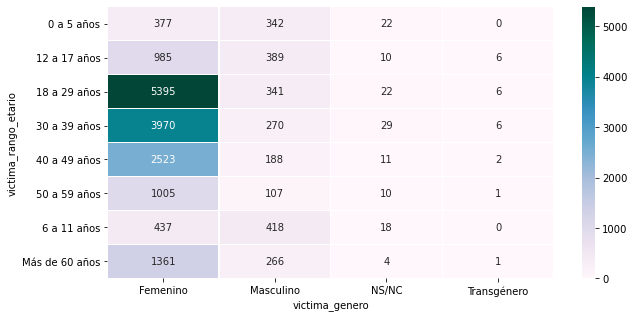

In [37]:
plt.figure(figsize=[10,5])
ax = sns.heatmap(edad_genero,
                 annot=True, 
                 fmt="d",
                 linewidths=.5,
                 cmap="PuBuGn")

### ¿Que?

Las variables que se escogieron para la visualización son variables de tipo categóricas las cuales son las variables rango de edad de la victima de un llamado de emergencia por violencia domestica y la otra variable es el género de la víctima, con el fin de relacionar las variables se elaboro una tabla de contingencias con el fin de contar las frecuencias de las 2 variables en cada categoría y así elaborar el mapa de color.

### ¿Por que?

Relacionar categorías entre las variables genero de la victima y rango de edad de la victima con el fin de encontrar las frecuencias de las variables en cada categoría de ambas variables, para así descubrir relaciones posibles entre las categorías y observar que tantos individuos son más frecuentes en la clasificación de ambas variables.

### ¿Cómo?

No se requiere interacción con el usuario debido a que se cumple el objetivo de exponer las frecuencias de las categorías y resaltar cuales son las mas grandes con colores oscuros y las menos frecuentes con colores claros.

### Marca

La marca de esta visualización es por áreas ya que a través de áreas cuadriculadas separa las distintas categorías de las variables género de la victima y rango de edad de la victima, para que se distingan cuando se cruzan entre estas.

### Canal

El canal de la visualización es el de color, siendo que para las frecuencias altas en el cruce de las variables categóricas los colores son de verde oscuro y los que tienen frecuencias menores son de colores claros. Siendo los mas indicados para distinguir la cantidad de frecuencias.